# **1.DATA PULL FROM RDS**

In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
# Database connection details
db_host = "chefmate.c9ou4ceauye1.ap-south-1.rds.amazonaws.com"
db_user = "admin"
db_password = "hWTEFVJwPwC1axSWGlxz"
db_name = "chefmate"
db_port = 3306

In [3]:
# Create the connection string
connection_string = f"mysql+pymysql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)


In [4]:
query_1 = "SELECT * FROM Encoded_data_for_ML;"
dataset_1= pd.read_sql(query_1, engine)

OperationalError: (pymysql.err.OperationalError) (1524, "Plugin 'mysql_native_password' is not loaded")
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
dataset_1.to_csv("preprocessed_restaurant_data.csv", index=False)

In [ ]:
dataset_1.head()

,restaurant.id,Afghani,African,American,Andhra,Arabian,Argentine,Armenian,Asian,Asian Fusion,...,Tea,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,308322.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,18017612.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18313566.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18353121.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,18354483.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **2.MODEL TRAINING**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('preprocessed_restaurant_data.csv')

In [ ]:
data.isnull().sum()

,0
restaurant.id,0
Afghani,0
African,0
American,0
Andhra,0
...,...
Turkish Pizza,0
Vegetarian,0
Vietnamese,0
Western,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
restaurant.id,0
Afghani,0
African,0
American,0
Andhra,0
...,...
Turkish Pizza,0
Vegetarian,0
Vietnamese,0
Western,0


**1.KMeans**

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed
kmeans_labels = kmeans.fit_predict(data)


**2.HIERARCHICAL**

In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=4)
hierarchical_labels = hierarchical.fit_predict(data)


**3.GAUSSIAN MIXTURE**

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(data)


**Evaluate Clustering Models**

**1.Silhouette Score**

In [ ]:
silhouette_kmeans = silhouette_score(data, kmeans_labels)
silhouette_hierarchical = silhouette_score(data, hierarchical_labels)
silhouette_gmm = silhouette_score(data, gmm_labels)


**2.Calinski-Harabasz Score**

In [ ]:
ch_kmeans = calinski_harabasz_score(data, kmeans_labels)
ch_hierarchical = calinski_harabasz_score(data, hierarchical_labels)
ch_gmm = calinski_harabasz_score(data, gmm_labels)



**Comparing and Choosing the Best Model**

In [ ]:
results = {
    'Model': ['K-Means', 'Hierarchical', 'GMM'],
    'Silhouette Score': [silhouette_kmeans, silhouette_hierarchical, silhouette_gmm],
    'Calinski-Harabasz Score': [ch_kmeans, ch_hierarchical, ch_gmm]
}
results_df = pd.DataFrame(results)
print(results_df)


          Model  Silhouette Score  Calinski-Harabasz Score
0       K-Means          0.912553            750248.478826
1  Hierarchical          0.898095            586158.031909
2           GMM         -0.442073                62.998815


**Visualizing the Results**

In [ ]:
from sklearn.decomposition import PCA

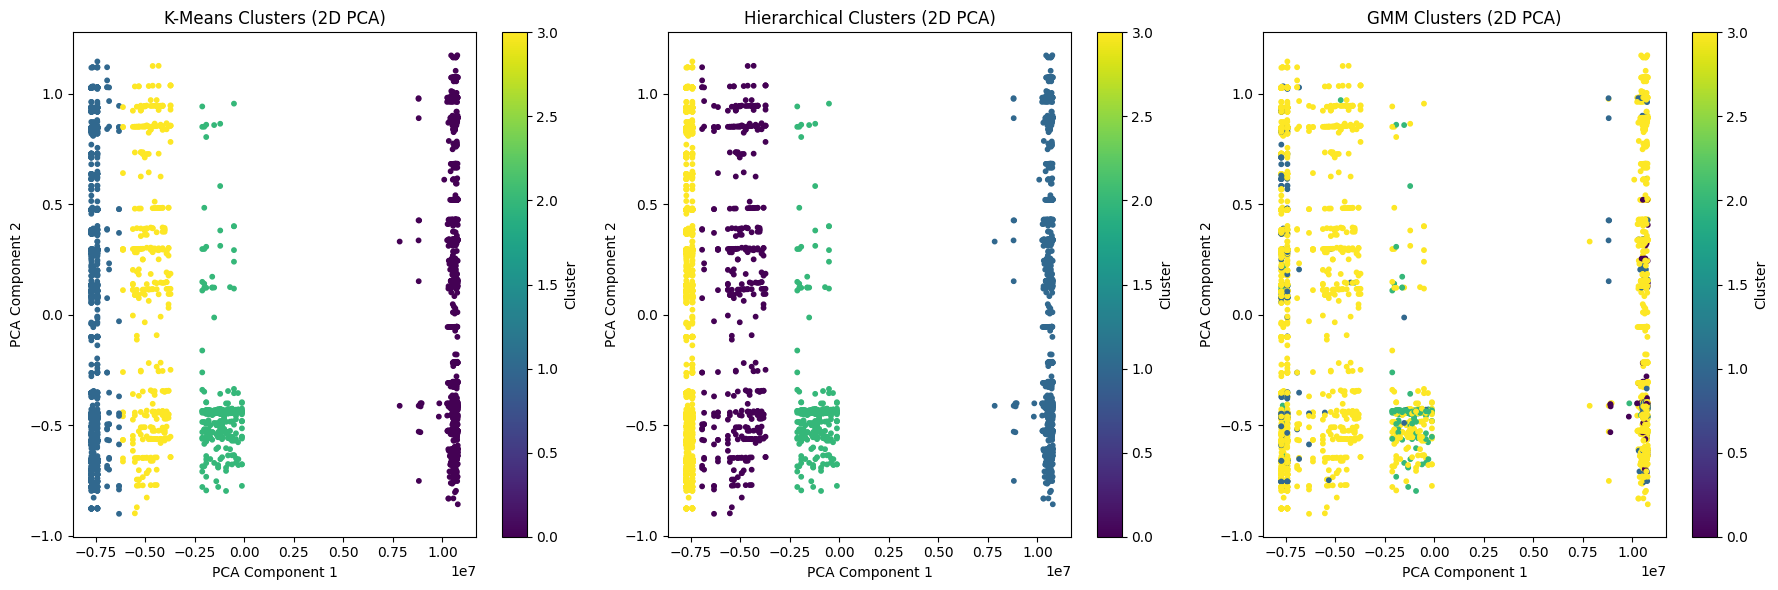

In [ ]:
# Applying PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Ploting results
models = {
    "K-Means":kmeans_labels ,
    "Hierarchical": hierarchical_labels,
    "GMM": gmm_labels
}

plt.figure(figsize=(18, 6))
for i, (name, labels) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=10)
    plt.colorbar(label='Cluster')
    plt.title(f'{name} Clusters (2D PCA)')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


In [ ]:
data['Cluster'] = kmeans_labels  # Adding the cluster labels


In [ ]:
data['Cluster'].value_counts()

,count
Cluster,
1,1666
0,1393
3,374
2,367


**Saving the Final Clustered Data**

In [ ]:
data.to_csv('clustered_restaurants.csv', index=False)


In [ ]:
from google.colab import files

files.download("clustered_restaurants.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data.head()

,restaurant.id,Afghani,African,American,Andhra,Arabian,Argentine,Armenian,Asian,Asian Fusion,Assamese,Australian,Awadhi,BBQ,Bakery,Bar Food,Belgian,Bengali,Beverages,Bihari,Biryani,Brazilian,Breakfast,British,Burger,Burmese,Börek,Cafe,Cajun,Cantonese,Charcoal Grill,Chettinad,Chinese,Coffee and Tea,Contemporary,Continental,Cuisine Varies,Curry,Deli,Desserts,Dim Sum,Durban,Döner,European,Fast Food,Filipino,Finger Food,Fish and Chips,French,Fresh Fish,Fusion,German,Goan,Gourmet Fast Food,Greek,Grill,Gujarati,Healthy Food,Hyderabadi,Ice Cream,Indian,Indonesian,International,Iranian,Italian,Izgara,Japanese,Juices,Kashmiri,Kebab,Kerala,Kiwi,Korean,Latin American,Lebanese,Lucknowi,Maharashtrian,Malay,Malaysian,Malwani,Mangalorean,Mediterranean,Mexican,Middle Eastern,Mineira,Mithai,Modern Australian,Modern Indian,Moroccan,Mughlai,Naga,Nepalese,North Eastern,North Indian,Pakistani,Parsi,Patisserie,Peranakan,Peruvian,Pizza,Portuguese,Pub Food,Rajasthani,Ramen,Raw Meats,Restaurant Cafe,Salad,Sandwich,Scottish,Seafood,Singaporean,South African,South Indian,Southwestern,Spanish,Sri Lankan,Steak,Street Food,Sunda,Sushi,Taiwanese,Tapas,Tea,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine,Cluster
0,308322.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,18017612.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18313566.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18353121.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18354483.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
